In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
left=df[df.left==1]
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
left.shape

(3571, 10)

In [8]:
retained=df[df.left==0]
retained

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [14]:
numeric_columns = df.select_dtypes(include=[float, int]).columns
df.groupby('left')[numeric_columns].mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321


## Employee retention is dependent on the following factors:
* satisfaction_level	
* average_montly_hours
* promotion_last_5years
* Salary

<Axes: xlabel='salary'>

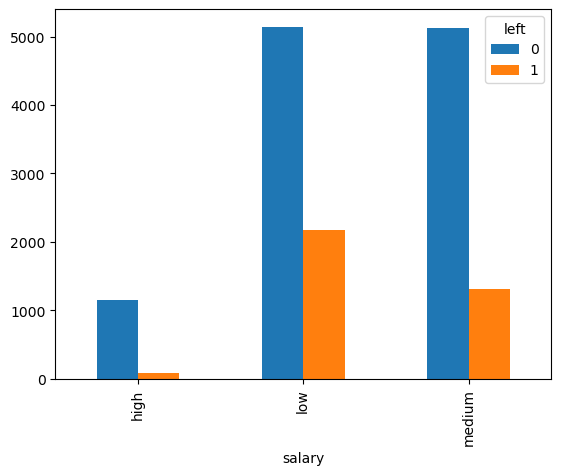

In [16]:
pd.crosstab(df.salary,df.left).plot(kind="bar")

<Axes: xlabel='average_montly_hours'>

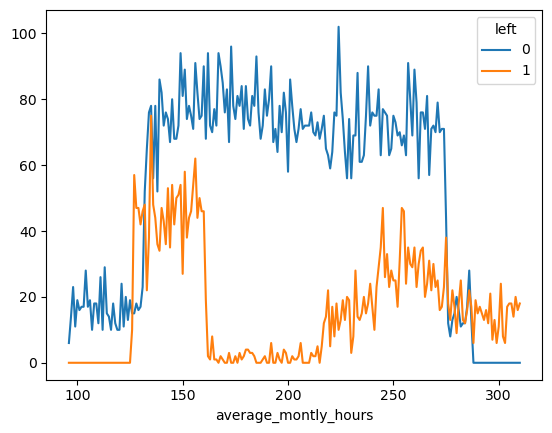

In [51]:
pd.crosstab(df.average_montly_hours,df.left).plot(kind="line")

<Axes: xlabel='Department'>

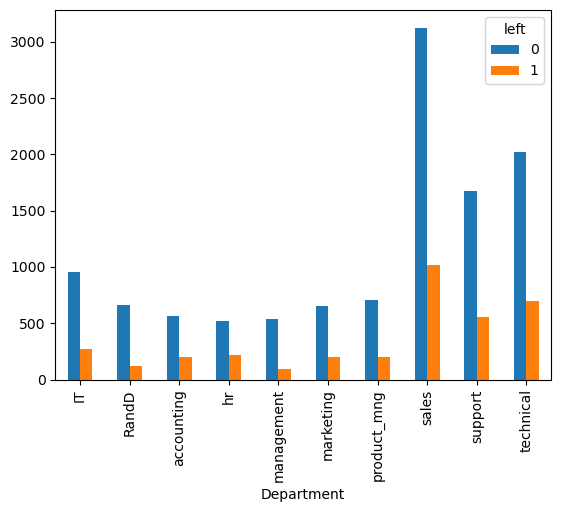

In [17]:
pd.crosstab(df.Department,df.left).plot(kind="bar")

In [18]:
new_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [19]:
dummies=pd.get_dummies(new_df.salary)

In [20]:
dummies

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [23]:
df_final=pd.concat([new_df,dummies],axis=1)
df_final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [24]:
df_final.drop('salary',axis=1,inplace=True)
df_final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x=df_final
y=df.left

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [28]:
clf=LogisticRegression()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7877333333333333

In [29]:
x_test

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
9459,0.65,163,0,False,False,True
4602,0.95,242,0,False,True,False
4379,0.39,115,0,False,True,False
5020,0.86,274,0,False,True,False
3233,0.57,148,0,True,False,False
...,...,...,...,...,...,...
3117,0.75,138,0,False,False,True
14502,0.87,231,0,False,True,False
10561,0.74,190,0,False,True,False
5766,0.72,202,0,False,True,False


In [32]:
clf.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
clf.score(x_test,y_test)

0.9354666666666667

* RandomForestClassifier has much high accuracy than LogisticRegression

In [47]:
clf.predict([[0.63,200,1,0,0,1],[0.72,300,0,0,1,0]])

C:\Users\hp\sample_project\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 1], dtype=int64)